In [1]:
# Mail_Customers.csv
#location

In [5]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [6]:
df=pd.read_csv('Mall_Customers.csv')

In [7]:
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [8]:
x=df[['Annual Income (k$)','Spending Score (1-100)']] # x=df.iloc[:,3,4]

In [9]:
x

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [10]:
###### Visualize

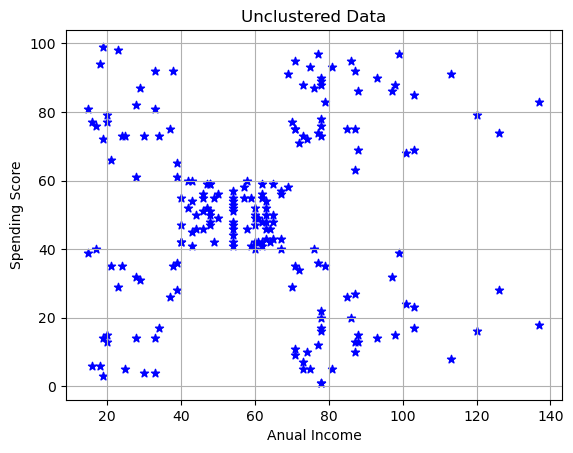

In [11]:
plt.title('Unclustered Data')
plt.grid()
plt.xlabel('Anual Income')
plt.ylabel('Spending Score')
plt.scatter(x.iloc[:,0],x.iloc[:,1],color='b', marker='*')

In [12]:
####

In [13]:
from sklearn.cluster import KMeans

In [63]:
km=KMeans(random_state=0, n_clusters=10)

In [64]:
km.fit(x)

C:\Users\rajesh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\rajesh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=10, random_state=0)

In [65]:
# SSE Sum Square Error
km.inertia_

20736.67993892412

In [66]:
######

In [37]:
sse=[]
for k in range(1,15):
    km=KMeans(random_state=0, n_clusters=k, n_init=10)
    km.fit(x)
    sse.append(km.inertia_)

C:\Users\rajesh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\rajesh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\rajesh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\rajesh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Wi

In [38]:
sse

[269981.28,
 181363.595959596,
 106348.3730621112,
 73679.78903948834,
 44448.45544793371,
 37265.86520484346,
 30259.65720728547,
 25095.703209997544,
 21830.041978049434,
 20736.67993892412,
 17702.595932296277,
 15810.838613705502,
 14763.330402558206,
 13165.329070181626]

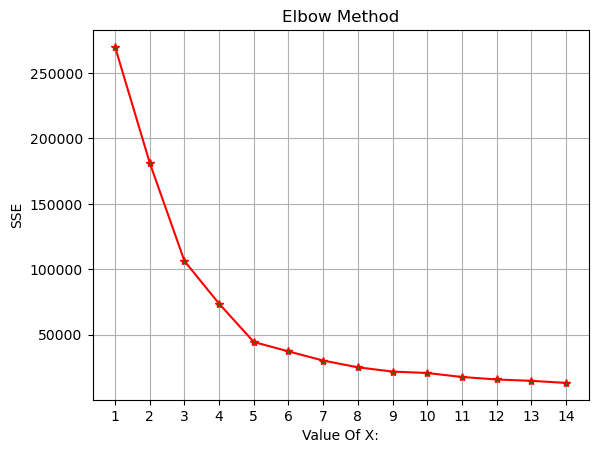

In [40]:
plt.title('Elbow Method')
plt.grid()
plt.xlabel('Value Of X:')
plt.ylabel('SSE')
plt.xticks(range(1,15))
plt.plot(range(1,15),sse,color='red', marker='*',mfc='green')

In [41]:
########## Library install

In [46]:
pip install kneed -U

Note: you may need to restart the kernel to use updated packages.


In [51]:
from kneed import KneeLocator

In [54]:
kl=KneeLocator(range(1,15),sse,curve='convex',direction='decreasing')

In [55]:
##############

In [56]:
# silhoutScore

In [58]:
from sklearn.metrics import silhouette_score

In [62]:
score=silhouette_score(x,km.labels_)

ValueError: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)

In [70]:
silh=[]
for k in range(2,15):
    km=KMeans(random_state=0,n_clusters=k, n_init=10)
    km.fit(x)
    score=silhouette_score(x,km.labels_)
    silh.append(score)

C:\Users\rajesh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\rajesh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\rajesh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\rajesh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Wi

In [68]:
silh

[0.2968969162503008,
 0.46761358158775435,
 0.4931963109249047,
 0.553931997444648,
 0.5379675585622219,
 0.5264283703685728,
 0.45704384633565154,
 0.4563032021725485,
 0.4492169169017592,
 0.437104484577306,
 0.42507724579994494,
 0.4361876168478583,
 0.40466460708668867]

<BarContainer object of 13 artists>

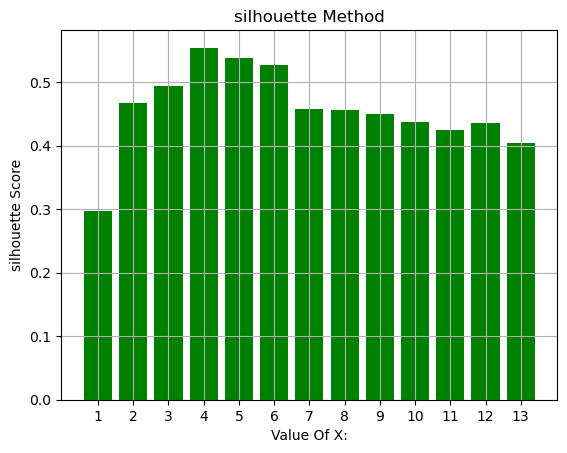

In [77]:
plt.title('silhouette Method')
plt.grid()
plt.xlabel('Value Of X:')
plt.ylabel('silhouette Score')
plt.xticks(range(1,14))
plt.bar(range(1,14),silh,color='g')

In [78]:
### Create the clustor

km=KMeans(random_state=0,n_clusters=5, n_init=10)

In [83]:
y=km.fit_predict(x)

C:\Users\rajesh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [84]:
y

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

In [85]:
km.inertia_

44448.45544793371

In [89]:
cents=km.cluster_centers_
cents

array([[88.2       , 17.11428571],
       [55.2962963 , 49.51851852],
       [86.53846154, 82.12820513],
       [25.72727273, 79.36363636],
       [26.30434783, 20.91304348]])

In [ ]:
## Visualization of Clustered Data

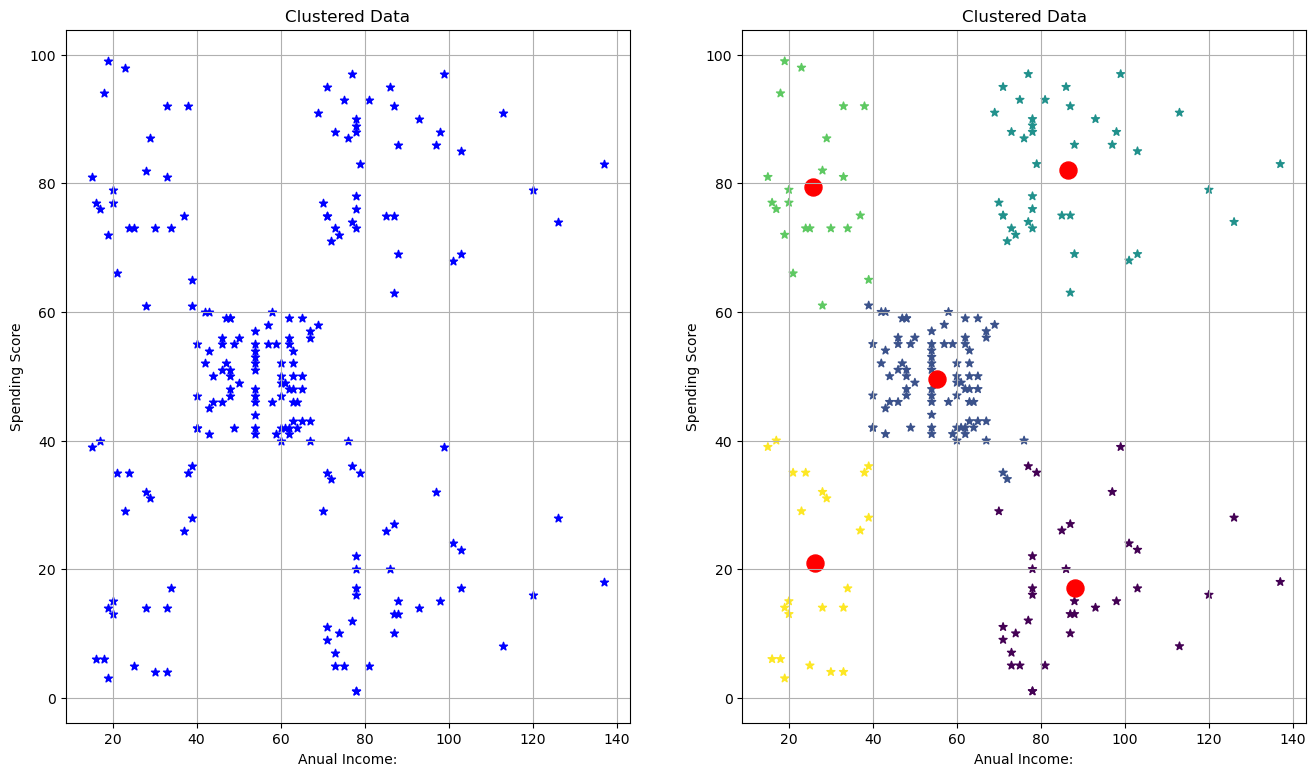

In [98]:
plt.figure(figsize=(16,9))
plt.subplot(1,2,1)
plt.title('Clustered Data')
plt.grid()
plt.xlabel('Anual Income:')
plt.ylabel('Spending Score')
plt.scatter(x.iloc[:,0],x.iloc[:,1],color='b', marker='*')



#plt.figure(figsize=(16,9))
plt.subplot(1,2,2)
plt.title('Clustered Data')
plt.grid()
plt.xlabel('Anual Income:')
plt.ylabel('Spending Score')
plt.scatter(x.iloc[:,0],x.iloc[:,1],c=y, marker='*')
plt.scatter(cents[:,0], cents[:,1],color='red',s=150)


In [99]:
#### filter the clusters

In [106]:
df.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [103]:
zero=df[y==0] # masking by y in data frame df
one=df[y==1]
two=df[y==2]
three=df[y==3]
four=df[y==4]
zero.shape,one.shape,two.shape,three.shape,four.shape

((35, 5), (81, 5), (39, 5), (22, 5), (23, 5))

In [107]:
four.to_csv('cluster-four.csv',index=False)

In [108]:
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [109]:
df['label']=y

In [110]:
import seaborn as sns

C:\Users\rajesh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\rajesh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


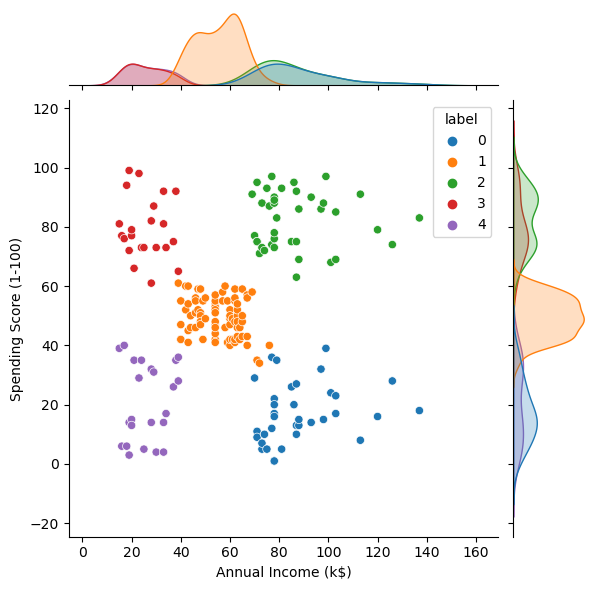

In [112]:
sns.jointplot(x='Annual Income (k$)',y='Spending Score (1-100)', data=df, hue='label', palette='tab10')

In [113]:
### Predict on Unknown Data

In [115]:
new=pd.DataFrame(data=[[56,78],[21,79],[93,56],[45,41],[76,66],[23,30]], columns=x.columns)

In [116]:
new

,Annual Income (k$),Spending Score (1-100)
0,56,78
1,21,79
2,93,56
3,45,41
4,76,66
5,23,30


In [117]:
new.shape

(6, 2)

In [118]:
km=KMeans(random_state=0, n_clusters=3)

In [119]:
km.fit(new)

C:\Users\rajesh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\rajesh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3, random_state=0)